# Phishing Detector with LR and KNN

#### DESCRIPTION

#### Background of Problem Statement :

You are expected to write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data. You have to use one or more of the classification algorithms to train a model on the phishing website dataset.

#### Problem Objective :

The dataset is a text file.

Domain: Cyber Security and Web Mining

Questions to be answered with analysis :

1) Write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data.

2) Use one or more of the classification algorithms to train a model on the phishing website dataset.

#### Analysis Tasks to be performed:

Initiation :

Begin by creating a new ipynb file and load the dataset in it.

Exercise 1 :

Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 
Use 70% of data as training data and the remaining 30% as test data.                                                                                                                                                                         
Print count of misclassified samples in the test data prediction as well as the accuracy score of the model. 
 
Exercise 2 :

Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.

Check accuracy using the test data and compare the accuracy with the previous value.

Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

Hint :
The dataset is a “.txt” file with no headers and has only the column values.

The actual column-wise header is described below and, if needed, you can add the header manually.

The header list is as follows :

[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report

In [5]:
df = pd.read_csv("phishing.txt", header= None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
df.columns = [ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 
              'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 
              'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 
              'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 
              'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class' ]

In [8]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [16]:
df.shape

(11055, 31)

In [10]:
df["class"].value_counts()

 1    6157
-1    4898
Name: class, dtype: int64

In [12]:
for col in df.columns:
    
    print(col)
    print(df[col].nunique())

UsingIP
2
LongURL
3
ShortURL
2
Symbol@
2
Redirecting//
2
PrefixSuffix-
2
SubDomains
3
HTTPS
3
DomainRegLen
2
Favicon
2
NonStdPort
2
HTTPSDomainURL
2
RequestURL
2
AnchorURL
3
LinksInScriptTags
3
ServerFormHandler
3
InfoEmail
2
AbnormalURL
2
WebsiteForwarding
2
StatusBarCust
2
DisableRightClick
2
UsingPopupWindow
2
IframeRedirection
2
AgeofDomain
2
DNSRecording
2
WebsiteTraffic
3
PageRank
2
GoogleIndex
2
LinksPointingToPage
3
StatsReport
2
class
2


In [13]:
# All columns are categorical.

In [14]:
for col in df.columns:
    
    print(col)
    print(df[col].value_counts())

UsingIP
 1    7262
-1    3793
Name: UsingIP, dtype: int64
LongURL
-1    8960
 1    1960
 0     135
Name: LongURL, dtype: int64
ShortURL
 1    9611
-1    1444
Name: ShortURL, dtype: int64
Symbol@
 1    9400
-1    1655
Name: Symbol@, dtype: int64
Redirecting//
 1    9626
-1    1429
Name: Redirecting//, dtype: int64
PrefixSuffix-
-1    9590
 1    1465
Name: PrefixSuffix-, dtype: int64
SubDomains
 1    4070
 0    3622
-1    3363
Name: SubDomains, dtype: int64
HTTPS
 1    6331
-1    3557
 0    1167
Name: HTTPS, dtype: int64
DomainRegLen
-1    7389
 1    3666
Name: DomainRegLen, dtype: int64
Favicon
 1    9002
-1    2053
Name: Favicon, dtype: int64
NonStdPort
 1    9553
-1    1502
Name: NonStdPort, dtype: int64
HTTPSDomainURL
 1    9259
-1    1796
Name: HTTPSDomainURL, dtype: int64
RequestURL
 1    6560
-1    4495
Name: RequestURL, dtype: int64
AnchorURL
 0    5337
-1    3282
 1    2436
Name: AnchorURL, dtype: int64
LinksInScriptTags
 0    4449
-1    3956
 1    2650
Name: LinksInScriptTags, 

In [15]:
# All Columns have values in (-1,0,1) only.
# No need to apply Label Encoder or Standardization.

### Train Test Spilt:

In [17]:
x = df.drop("class",axis= 1)
y = df["class"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8844, 30)
(8844,)
(2211, 30)
(2211,)


### Logisitc Regression:

In [35]:
logreg = LogisticRegression(C= 100)

In [36]:
logreg.fit(x_train, y_train)

LogisticRegression(C=100)

In [37]:
pred = logreg.predict(x_test)

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



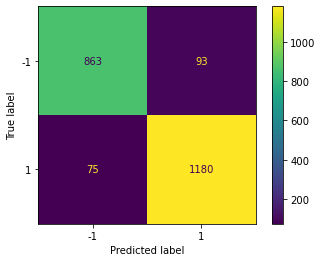

In [39]:
plot_confusion_matrix(logreg, x_test, y_test)
plt.show()

### KNN:

In [29]:
knn = KNeighborsClassifier(n_neighbors= 10)

In [30]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
pred = knn.predict(x_test)

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93       956
           1       0.95      0.93      0.94      1255

    accuracy                           0.94      2211
   macro avg       0.93      0.94      0.93      2211
weighted avg       0.94      0.94      0.94      2211



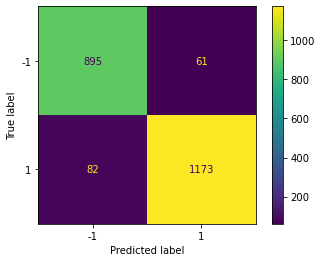

In [33]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

### Building Model Using Only Prefix_Suffix and URL_of_Anchor:

In [40]:
x.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [41]:
x_train_2 = x_train[["PrefixSuffix-", "AnchorURL"]]

In [42]:
x_test_2 = x_test[["PrefixSuffix-", "AnchorURL"]]

              precision    recall  f1-score   support

          -1       0.99      0.66      0.79       956
           1       0.80      1.00      0.88      1255

    accuracy                           0.85      2211
   macro avg       0.89      0.83      0.84      2211
weighted avg       0.88      0.85      0.85      2211



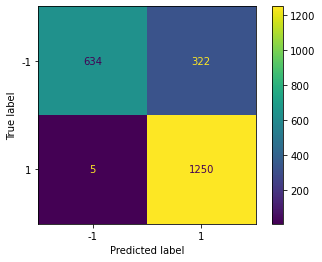

In [43]:
### Logistic Regression:

log_model_2 = LogisticRegression(C= 100)

log_model_2.fit(x_train_2, y_train)

pred = log_model_2.predict(x_test_2)

print(classification_report(y_test, pred))

plot_confusion_matrix(log_model_2, x_test_2, y_test)
plt.show()

              precision    recall  f1-score   support

          -1       0.99      0.66      0.79       956
           1       0.80      1.00      0.88      1255

    accuracy                           0.85      2211
   macro avg       0.89      0.83      0.84      2211
weighted avg       0.88      0.85      0.85      2211



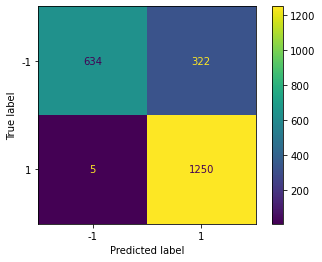

In [44]:
### knn:

knn_model_2 = KNeighborsClassifier(n_neighbors= 10)

knn_model_2.fit(x_train_2, y_train)

pred = knn_model_2.predict(x_test_2)

print(classification_report(y_test, pred))

plot_confusion_matrix(knn_model_2, x_test_2, y_test)
plt.show()

In [45]:
# Even after Removing 28 Independent Variables from Model, Accuracies of Both Models Dropped by Approximately 6-9% Only.
# Shows how Importnat these Two Independent Variable are to Classify Target Varible.

# Also, Using Two Independent Variables, Both Logistic Regression and KNN are giving Exactly same Result.